In [1]:
from pathlib import Path
from vangja.datasets import load_stock_data, get_sp500_tickers_for_range

CT_PATH = Path("../data/sp500_constituents")
TICKERS_PATH = Path("../data/tickers")

In [2]:
tickers = get_sp500_tickers_for_range("2015-01-01", "2017-01-01", cache_path=CT_PATH)
len(tickers)

454

In [3]:
smp = load_stock_data(
    ["^GSPC"],
    split_date="2015-01-01",
    window_size=10 * 365,
    horizon_size=365,
    cache_path=TICKERS_PATH,
    interpolate=True,
)
smp[0]

,ds,series,y
0,2005-01-04,^GSPC,1195.339996
1,2005-01-05,^GSPC,1187.059998
2,2005-01-06,^GSPC,1186.632507
3,2005-01-07,^GSPC,1187.109985
4,2005-01-08,^GSPC,1187.741659
...,...,...,...
3645,2014-12-28,^GSPC,2088.755839
3646,2014-12-29,^GSPC,2089.375000
3647,2014-12-30,^GSPC,2084.215027
3648,2014-12-31,^GSPC,2071.132507


In [4]:
from vangja import LinearTrend, FourierSeasonality
from vangja.utils import (
    metrics,
    plot_prior_predictive,
    plot_posterior_predictive,
    plot_prior_posterior,
)

In [40]:
smp_model = LinearTrend(n_changepoints=5, slope_sd=1, intercept_sd=1, delta_sd=0.01) + (
    FourierSeasonality(period=365, series_order=4, beta_sd=0.1)
    + FourierSeasonality(period=7, series_order=2, beta_sd=0.1)
)
smp_model.fit(smp[0], scaler="minmax", method="nuts", n=100000, samples=1000)
yhat = smp_model.predict(horizon=365)
metrics(smp[1], yhat)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lt_0 - slope, lt_0 - intercept, lt_0 - delta, fs_0 - beta(p=365,n=4), fs_1 - beta(p=7,n=2), sigma]
/home/jovan/miniconda3/envs/vangja20/lib/python3.13/multiprocessing/popen_fork.py:67: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/home/jovan/miniconda3/envs/vangja20/lib/python3.13/multiprocessing/popen_fork.py:67: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 337 seconds.


,mse,rmse,mae,mape
^GSPC,33373.200994,182.683335,149.884002,0.073706


<Axes: >

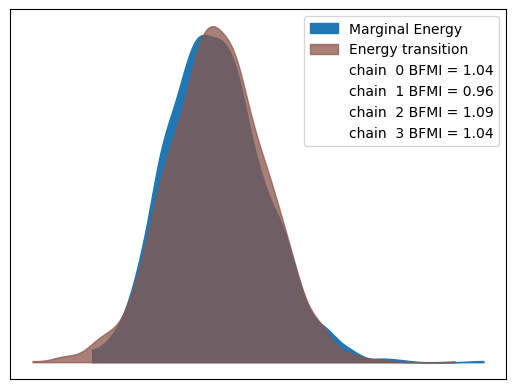

In [41]:
smp_model.plot_energy()

In [42]:
smp_model.convergence_summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lt_0 - slope,0.976,0.051,0.870,1.061,0.001,0.001,2180.0,2392.0,1.0
lt_0 - intercept,0.336,0.006,0.325,0.346,0.000,0.000,2490.0,3186.0,1.0
lt_0 - delta[0],-1.222,0.080,-1.366,-1.068,0.002,0.001,2152.0,2749.0,1.0
lt_0 - delta[1],-1.286,0.067,-1.405,-1.154,0.001,0.001,2696.0,3045.0,1.0
lt_0 - delta[2],2.681,0.049,2.597,2.779,0.001,0.001,2974.0,2966.0,1.0
lt_0 - delta[3],-0.006,0.016,-0.039,0.022,0.000,0.001,4352.0,1959.0,1.0
lt_0 - delta[4],0.894,0.047,0.807,0.984,0.001,0.001,4753.0,2817.0,1.0
"fs_0 - beta(p=365,n=4)[0]",0.005,0.002,0.002,0.009,0.000,0.000,6391.0,3308.0,1.0
"fs_0 - beta(p=365,n=4)[1]",-0.004,0.002,-0.008,-0.001,0.000,0.000,6945.0,2847.0,1.0
"fs_0 - beta(p=365,n=4)[2]",-0.002,0.002,-0.005,0.001,0.000,0.000,6667.0,2850.0,1.0


In [43]:
smp_prior_predictive = smp_model.sample_prior_predictive()

Sampling: [fs_0 - beta(p=365,n=4), fs_1 - beta(p=7,n=2), lt_0 - delta, lt_0 - intercept, lt_0 - slope, obs, sigma]


<Axes: title={'center': 'Prior Predictive Check'}, xlabel='Observation index', ylabel='y'>

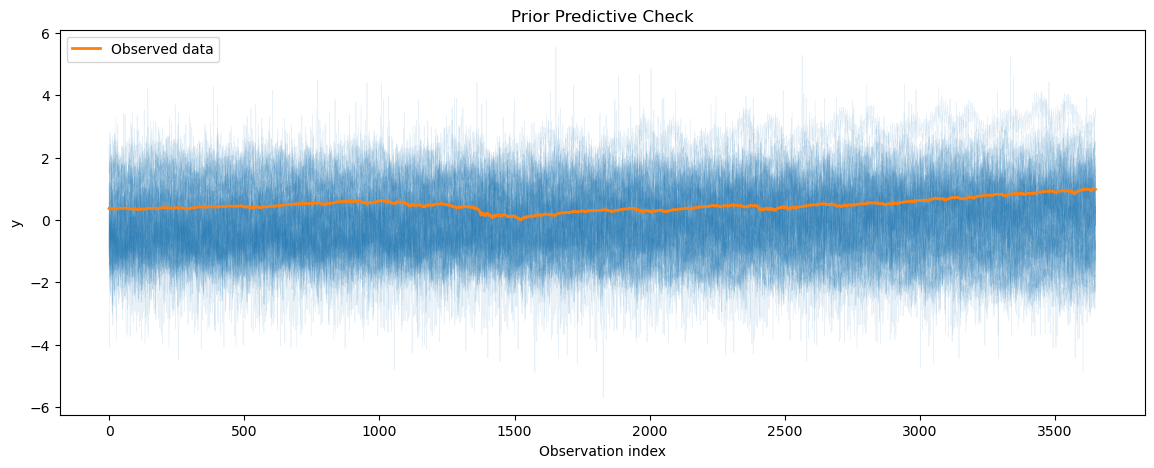

In [44]:
plot_prior_predictive(smp_prior_predictive, smp_model.data)

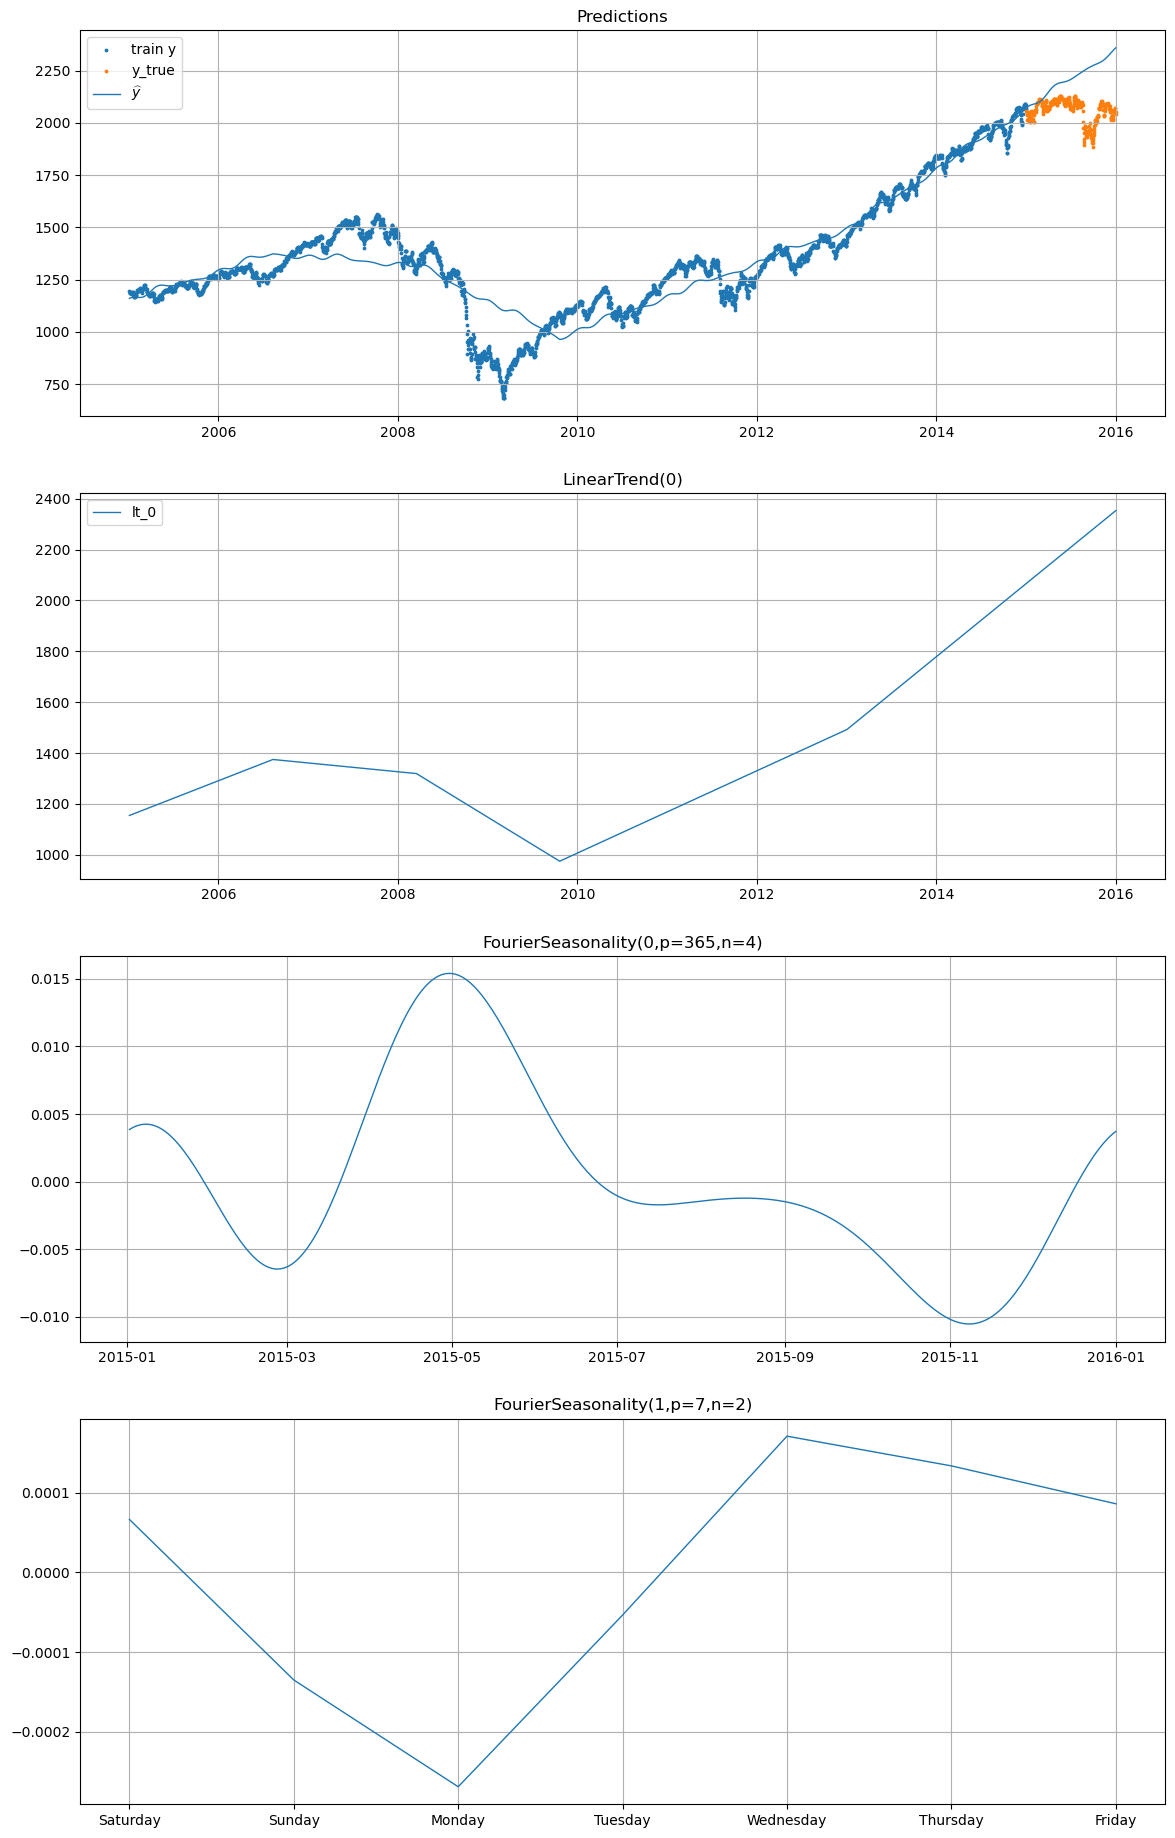

In [45]:
smp_model.plot(yhat, series="^GSPC", y_true=smp[1])

Sampling: [obs]


Output()

<Axes: title={'center': 'Posterior Predictive Check'}, xlabel='Observation index', ylabel='y'>

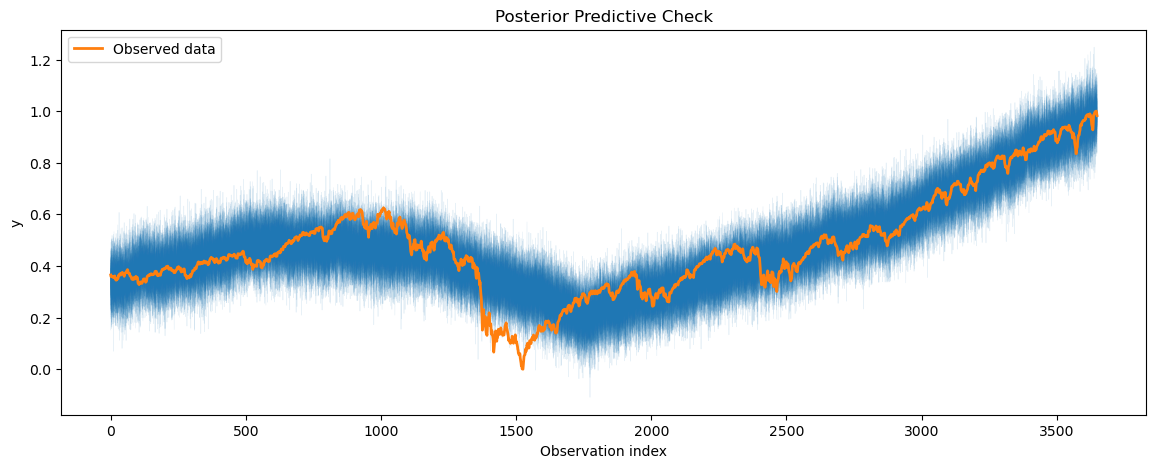

In [46]:
smp_posterior_predictive = smp_model.sample_posterior_predictive()
plot_posterior_predictive(smp_posterior_predictive, smp_model.data)

In [47]:
dfs = load_stock_data(
    tickers,
    split_date="2015-01-01",
    window_size=91,
    horizon_size=365,
    cache_path=TICKERS_PATH,
    interpolate=True,
)

$SNI: possibly delisted; no price data found  (1d 1900-01-01 -> 2026-01-01)
$BHI: possibly delisted; no price data found  (1d 1900-01-01 -> 2026-01-01)
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: HES"}}}
$HES: possibly delisted; no timezone found
$XEC: possibly delisted; no timezone found
$RAI: possibly delisted; no price data found  (1d 1900-01-01 -> 2026-01-01) (Yahoo error = "1d data not available for startTime=-2208970800 and endTime=1767243600. Only 100 years worth of day granularity data are allowed to be fetched per request.")
$ADS: possibly delisted; no timezone found
$SWN: possibly delisted; no timezone found
$RHT: possibly delisted; no timezone found
$CHK: possibly delisted; no timezone found
$WFM: possibly delisted; no price data found  (1d 1900-01-01 -> 2026-01-01) (Yahoo error = "1d data not available for startTime=-2208970800 and endTime=1767243600. Only 100 years worth of day granularity data are a

In [48]:
dfs[0]

,ds,series,y
0,2014-10-03,A,36.882479
1,2014-10-04,A,36.931917
2,2014-10-05,A,36.981355
3,2014-10-06,A,37.030793
4,2014-10-07,A,36.274591
...,...,...,...
35030,2014-12-28,ZION,21.404275
35031,2014-12-29,ZION,21.406146
35032,2014-12-30,ZION,21.419240
35033,2014-12-31,ZION,21.411753


In [50]:
len(dfs[0]) / 91

385.0

In [65]:
model = LinearTrend(
    n_changepoints=0,
    slope_sd=1,
    intercept_sd=1,
    # tune_method="parametric",
    pool_type="individual",
) + (
    FourierSeasonality(
        period=365,
        series_order=4,
        beta_sd=0.1,
        tune_method="parametric",
        pool_type="individual",
    )
    + FourierSeasonality(period=7, series_order=2, beta_sd=0.1, pool_type="individual")
)
model.fit(
    dfs[0],
    idata=smp_model.trace,
    scaler="minmax",
    scale_mode="individual",
    t_scale_params=smp_model.t_scale_params,
    sigma_pool_type="individual",
    method="mapx"
)
yhat_tickers = model.predict(horizon=365)
metrics(dfs[1], yhat_tickers)

Output()

/home/jovan/repos/vangja/src/vangja/components/linear_trend.py:772: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future[f"lt_{self.model_idx}_{group_code}"] = forecasts[-1]
/home/jovan/repos/vangja/src/vangja/components/fourier_seasonality.py:549: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future[f"fs_{self.model_idx}_{group_code}"] = forecasts[-1]
/home/jovan/repos/vangja/src/vangja/components/fourier_seasonality.py:549: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

,mse,rmse,mae,mape
A,139213.840227,373.11371,52.281174,1.023265


In [66]:
ticker_metrics = metrics(dfs[1], yhat_tickers, pool_type="individual")
ticker_metrics

,mse,rmse,mae,mape
A,5.673685,2.381950,1.799926,0.051935
AAPL,7.953352,2.820169,2.358292,0.084786
ABBV,10.893123,3.300473,2.815858,0.072182
ABT,8.655411,2.942008,2.428576,0.062477
ACN,162.197801,12.735690,11.526648,0.136089
...,...,...,...,...
XYL,3.832072,1.957568,1.464015,0.049137
YUM,40.236860,6.343253,4.891921,0.096599
ZBH,54.422579,7.377166,6.491009,0.068693
ZION,2.217285,1.489055,1.194982,0.055634


In [67]:
ticker_metrics["mape"].mean()

np.float64(0.12644890694739278)

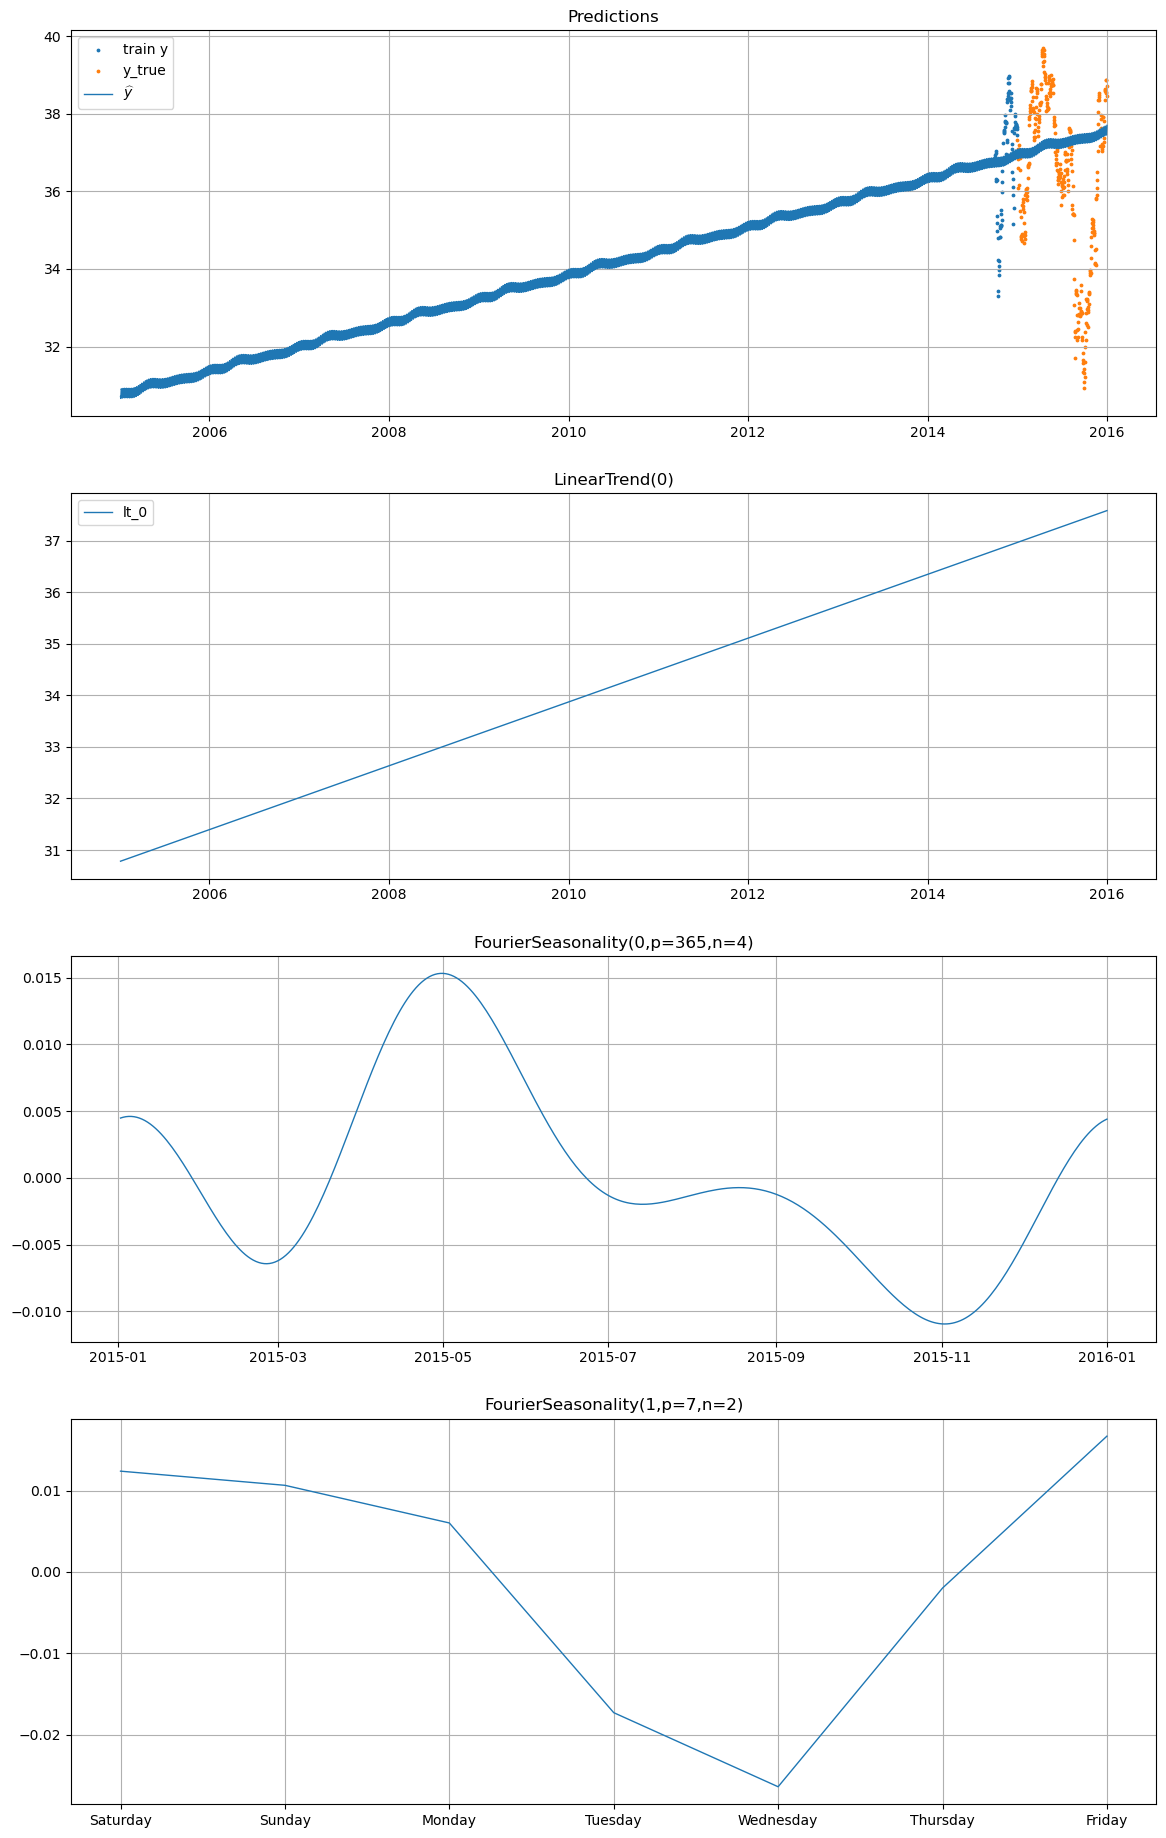

In [69]:
model.plot(yhat_tickers, series="A", y_true=dfs[1][dfs[1]["series"] == "A"])